In [1]:
from discopy import Ty, Box, Id, Diagram

folder = lambda file: '../docs/imgs/' + file
params = dict(
    aspect='auto',
    loop=True,
    draw_types=False)

In [2]:
x = Ty('x')
copy, add = Box('copy', x, x @ x), Box('add', x @ x, x)
CX = copy @ Id(x) >> Id(x) @ add
XC = Id(x) @ copy >> add @ Id(x)
diagram = CX @ XC >> XC @ CX
rewrite_steps = diagram.normalize(left=True)

diagram.to_gif(*rewrite_steps,
               path=folder('simple-rewrite.gif'), **params)

In [3]:
from discopy.moncat import spiral

diagram = spiral(3)
diagram.to_gif(*diagram.normalize(),
               path=folder('spiral.gif'),
               **dict(params, draw_box_labels=False, aspect='equal'))

In [4]:
snake = Box('f', x @ x, x @ x)\
    .transpose_l().transpose_l()\
    .transpose_r().transpose_r()

snake.to_gif(*snake.normalize(), **params,
             path=folder('snake-removal.gif'))

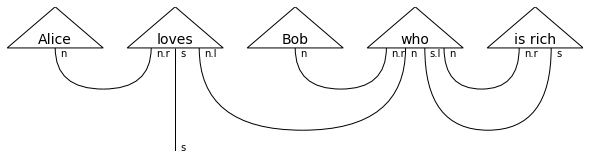

In [6]:
from discopy import Word, Cup, pregroup

s, n = Ty('s'), Ty('n')
Alice = Word('Alice', n)
loves = Word('loves', n.r @ s @ n.l)
Bob =  Word('Bob', n)
who = Word('who', n.r @ n @ s.l @ n)
is_rich = Word('is rich', n.r @ s)

noun_phrase = pregroup.eager_parse(Bob, who, is_rich, target=n)
grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
sentence = Alice @ loves @ noun_phrase >> grammar
pregroup.draw(sentence,
              aspect='auto', figsize=(8, 2),
              fontsize=14, fontsize_types=10)

Circuit for the three-legged Z spider:


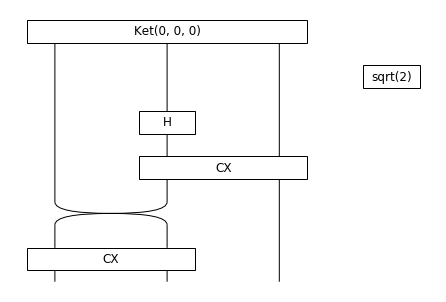

Matrix(dom=Dim(1), cod=Dim(2, 2, 2), array=[0.99999994, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.99999994])


In [7]:
from discopy.circuit import Circuit, sqrt, Ket, H, Rx, CX, SWAP

GHZ =  Ket(0, 0, 0) @ sqrt(2)\
    >> Circuit.id(1) @ H @ Circuit.id(1)\
    >> Circuit.id(1) @ CX\
    >> (SWAP >>  CX) @ Circuit.id(1)

print("Circuit for the three-legged Z spider:")
GHZ.draw(aspect='auto', draw_types=False)
print(GHZ.eval())

Image of CircuitFunctor on 'Bob who is rich.':


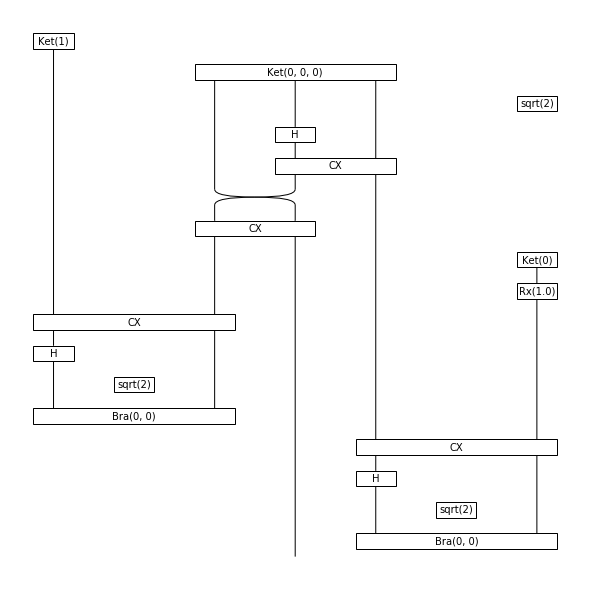

In [8]:
from discopy import CircuitFunctor

def intransitive_ansatz(phase):
    return Ket(0) >> Rx(phase)

def transitive_ansatz(phase):
    return sqrt(2) @ Ket(0, 0) >> H @ Rx(phase) >> CX

ob = {s: 0, n: 1}
ar = lambda **params: {
    Alice: Ket(0),
    loves: transitive_ansatz(params['loves']),
    Bob: Ket(1),
    who: GHZ,
    is_rich: intransitive_ansatz(params['is_rich'])}

F = lambda params: CircuitFunctor(ob, ar(**params))

params0 = {'loves': 0.5, 'is_rich': 1.}
print("Image of CircuitFunctor on 'Bob who is rich.':")
F(params0)(noun_phrase).draw(
    figsize=(8, 8), aspect='auto', draw_types=False, fontsize=10)

In [9]:
rewrite_steps = tuple(F(params0)(sentence).normalize())
F(params0)(sentence).to_gif(
    *rewrite_steps,
    path=folder('circuit-rewrite.gif'),
    **dict(params, loop=False, figsize=(8, 8)))

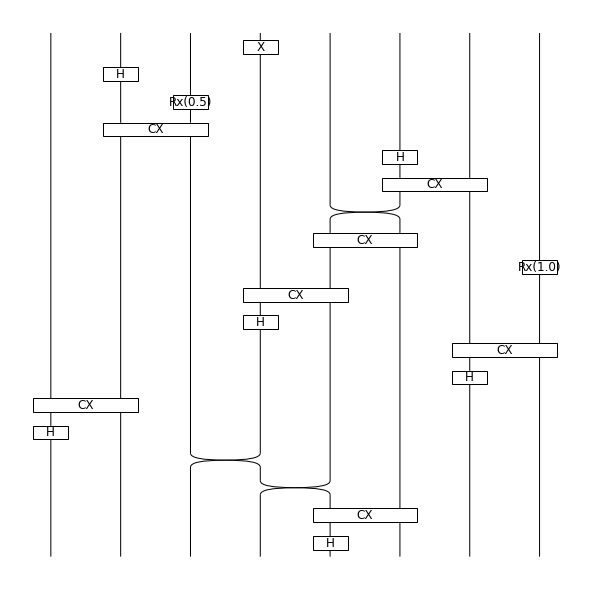

In [10]:
from discopy import Quiver, circuit

def remove_ket1(ket):
    x_gates = Circuit.id(0)
    for bit in ket.bitstring:
        x_gates = x_gates @ (circuit.X if bit else Circuit.id(1))
    return Ket(*(len(ket.bitstring) * (0, ))) >> x_gates

RemoveKet1 = CircuitFunctor(
    ob=Quiver(lambda x: len(x)),
    ar=Quiver(lambda f: remove_ket1(f) if isinstance(f, Ket) else f))

diagram = RemoveKet1(rewrite_steps[-1])
kets, circ, bras, scal =\
    diagram[0], diagram[1:-2], diagram[-1], diagram[-2]
circ.draw(figsize=(8, 8), aspect='auto', draw_types=False)

In [11]:
tk_circ = circ.to_tk()
print(tk_circ)
for gates in tk_circ: print(gates)

<tket::Circuit qubits=8, gates=16>
H q[1];
X q[2];
H q[3];
Rx(0.5*PI) q[4];
Rx(1*PI) q[7];
CX q[1], q[4];
CX q[3], q[6];
CX q[0], q[1];
CX q[3], q[5];
CX q[6], q[7];
H q[0];
CX q[2], q[3];
CX q[4], q[5];
H q[6];
H q[2];
H q[4];


In [12]:
rewrite_steps = tuple(circ.foliate())
print('depth = {}'.format(circ.depth()))
circ.to_gif(*rewrite_steps[:-1], path=folder('foliate.gif'), aspect='auto', draw_types=False)

depth = 10
